## Q2. Decision Tress Classifier on Car Dataset

In [33]:
#Importing Libraries
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [34]:
#Read dataset
data = pd.read_csv(r'C:\Users\patil\OneDrive\Desktop\JYPN\Datasets\car_evaluation.csv')
data.head()

,Cost,Maintainence,Doors,persons,luggage,safety,CarClass
0,vhigh,vhigh,2,2,small,low,unaccept
1,vhigh,vhigh,2,2,small,med,unaccept
2,vhigh,vhigh,2,2,small,high,unaccept
3,vhigh,vhigh,2,2,med,low,unaccept
4,vhigh,vhigh,2,2,med,med,unaccept


In [35]:
#Extarcting input data
x_data = data.drop('CarClass', axis=1)
x_data.head()

,Cost,Maintainence,Doors,persons,luggage,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [36]:
#Lable Encoding the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x_data = x_data.apply(le.fit_transform)
x_data.head()

,Cost,Maintainence,Doors,persons,luggage,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2


In [37]:
#Extracting the output data 
y_data = data.CarClass
y_data.head()

0    unaccept
1    unaccept
2    unaccept
3    unaccept
4    unaccept
Name: CarClass, dtype: object

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [39]:
dtc = DecisionTreeClassifier(random_state=12)

In [40]:
 dtc.fit(x_train, y_train)

DecisionTreeClassifier(random_state=12)

#### Plotting Confusion Matrix

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test,dtc.predict(x_test) )
print(cm)

[[ 72   4   3   0]
 [  0  17   0   0]
 [  1   0 239   0]
 [  1   0   0   9]]


#### Calculating the accuracy of the classifier

In [42]:
acc = accuracy_score(y_test, dtc.predict(x_test))
print('Accuracy = ',round(acc*100,2),'%')
print('Misclassification Error = ',round((1-acc)*100,2),'%')

Accuracy =  97.4 %
Misclassification Error =  2.6 %


### Accuracy = 97.4% and Misclassification Error = 2.6%

#### Plotting the Decision Tree

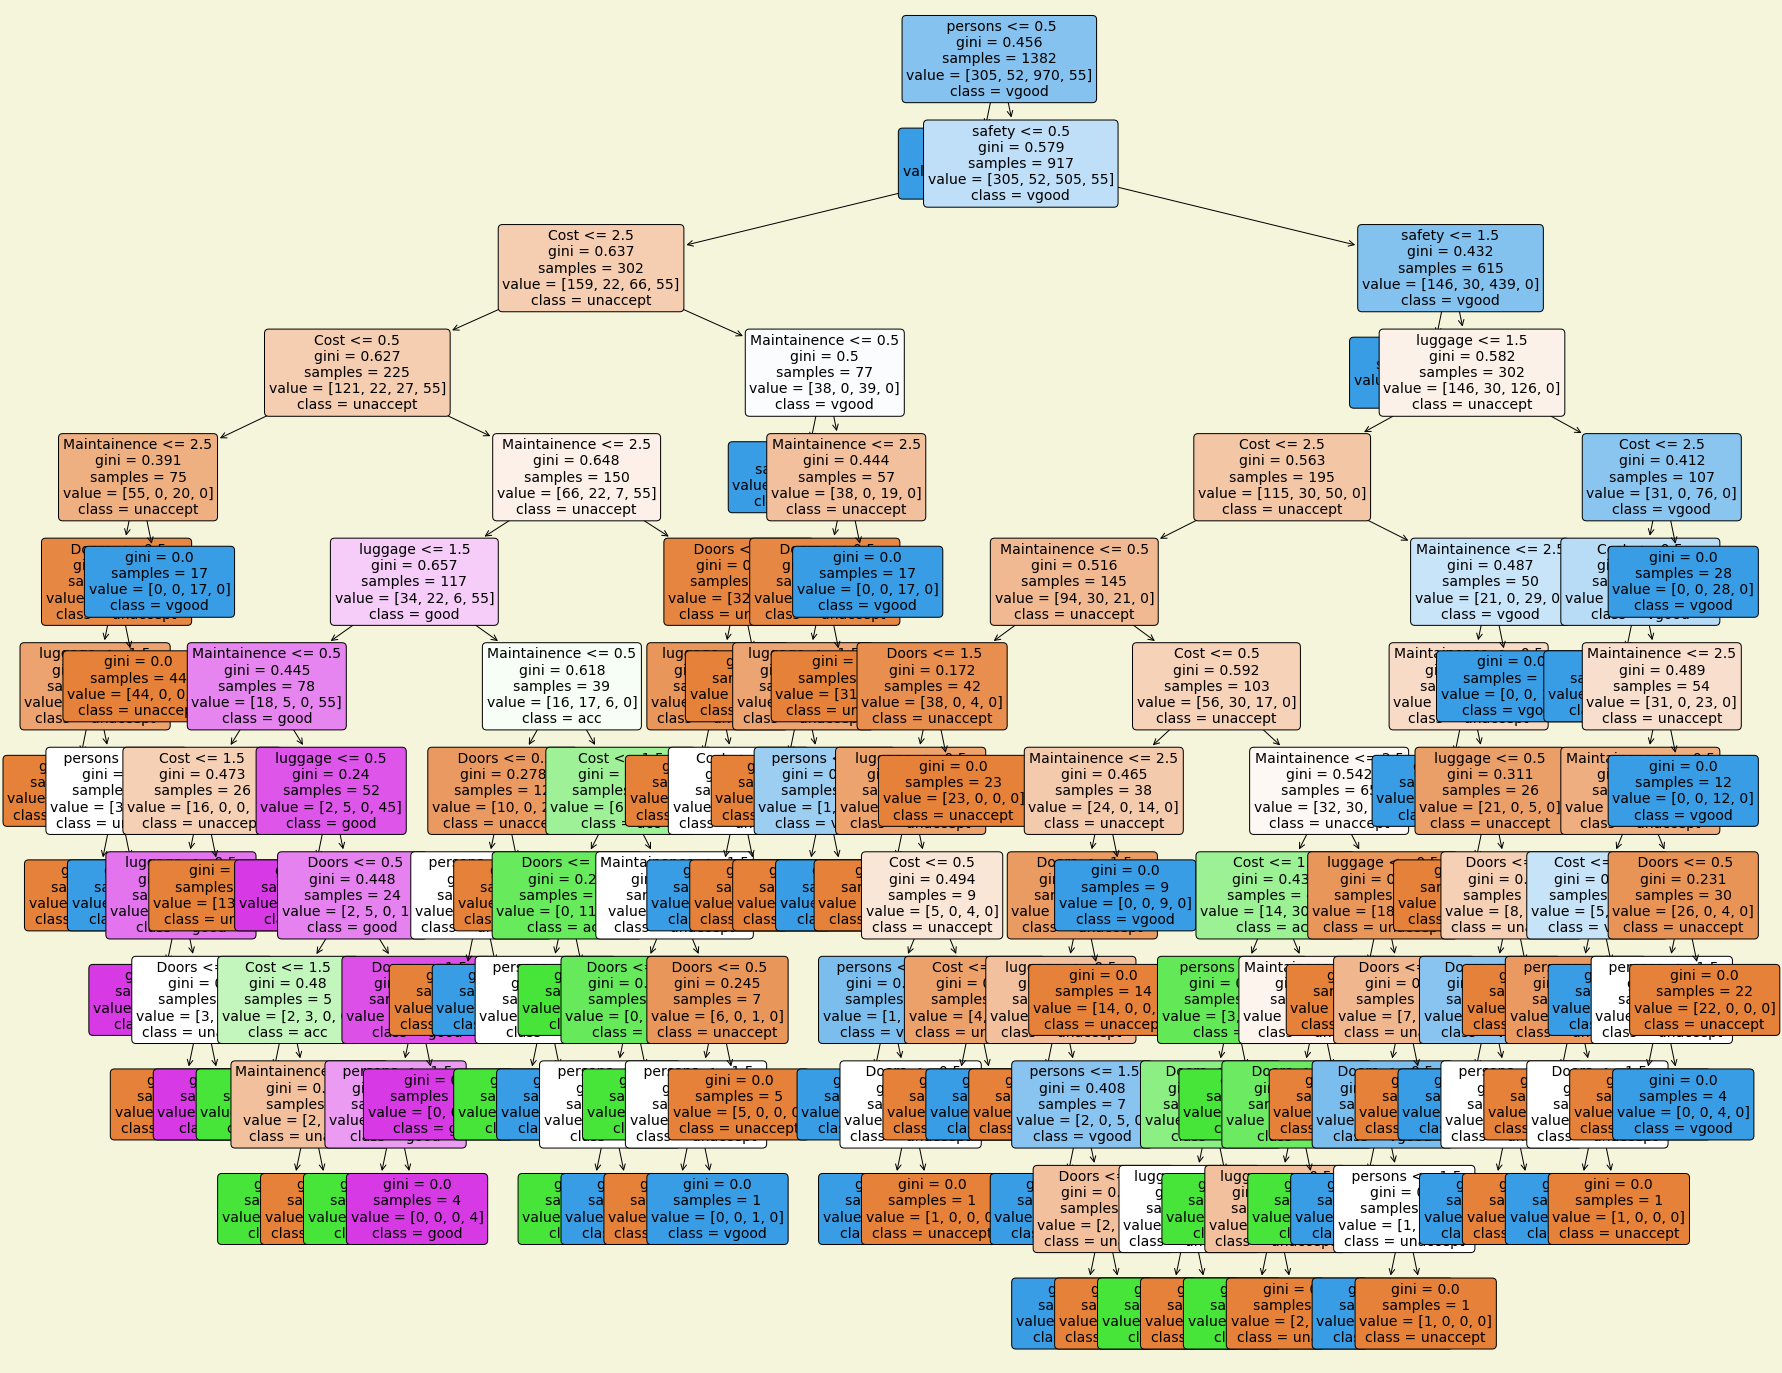

In [43]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(30,25), facecolor ='beige')

a = tree.plot_tree(dtc,
                   feature_names = x_data.columns,
                   class_names = y_data.unique(),
                   rounded = True,
                   filled = True,
                   fontsize=14)
#show the plot
plt.show()